<a href="https://colab.research.google.com/github/sameekshya1999/Face-Bluring-Tool/blob/main/Face_bluring_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.9 MB/s eta 0:00:00


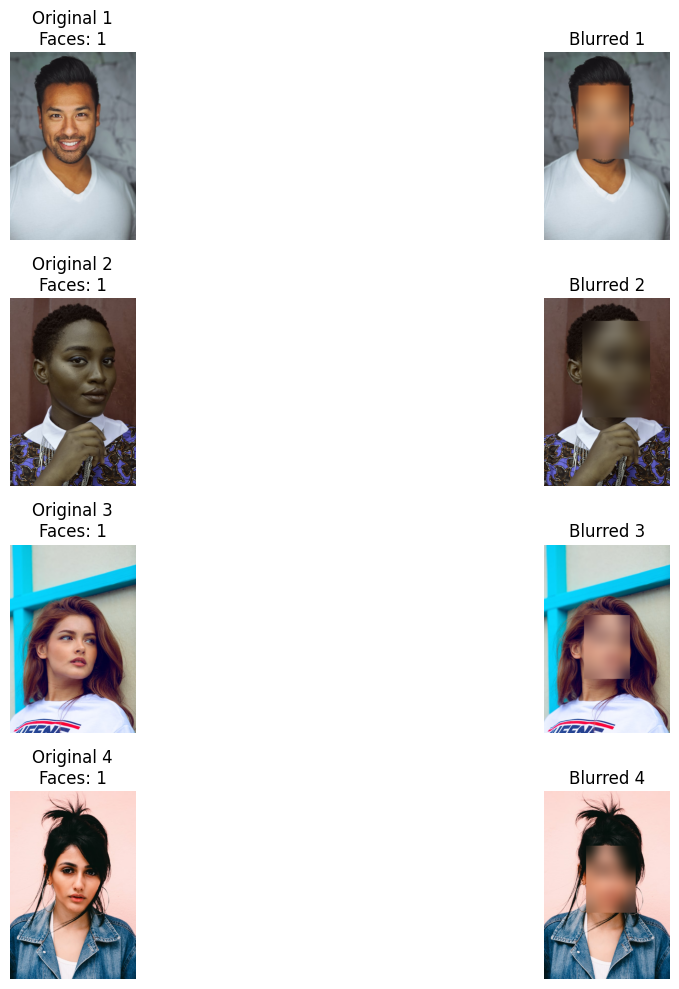

In [1]:
# Step 1: Install & Import Libraries
!pip install opencv-python numpy matplotlib requests mtcnn
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from mtcnn import MTCNN

# Step 2: Initialize MTCNN Detector (More accurate for diverse faces)
detector = MTCNN()

# Step 3: Define Face Blurring Function with MTCNN
def blur_faces(image_url):
    try:
        # Download image
        response = requests.get(image_url)
        img = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_COLOR)
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # MTCNN expects RGB

        # Detect faces
        faces = detector.detect_faces(rgb_img)

        # Blur each face
        for face in faces:
            x, y, w, h = face['box']
            roi = img[y:y+h, x:x+w]
            roi = cv2.GaussianBlur(roi, (99, 99), 30)  # Strong blur
            img[y:y+h, x:x+w] = roi

        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB), len(faces)
    except Exception as e:
        print(f"Error processing {image_url}: {e}")
        return None, 0

# Step 4: Test on Sample Images (Including diverse faces)
sample_urls = [
    "https://images.unsplash.com/photo-1507003211169-0a1dd7228f2d?ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60",  # Light skin
    "https://images.unsplash.com/photo-1531123897727-8f129e1688ce?ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60",  # Dark skin
    "https://images.unsplash.com/photo-1529626455594-4ff0802cfb7e?ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60",  # Medium skin
    "https://images.unsplash.com/photo-1488426862026-3ee34a7d66df?ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60"   # Group photo
]

# Step 5: Visualize Results
plt.figure(figsize=(15, 10))
for i, url in enumerate(sample_urls):
    try:
        # Get original and blurred images
        original_img = cv2.cvtColor(cv2.imdecode(np.frombuffer(requests.get(url).content, np.uint8), cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
        blurred_img, num_faces = blur_faces(url)

        if blurred_img is not None:
            # Plot original vs blurred
            plt.subplot(4, 2, 2*i+1)
            plt.imshow(original_img)
            plt.title(f"Original {i+1}\nFaces: {num_faces}")
            plt.axis('off')

            plt.subplot(4, 2, 2*i+2)
            plt.imshow(blurred_img)
            plt.title(f"Blurred {i+1}")
            plt.axis('off')
    except Exception as e:
        print(f"Skipping {url} due to error: {e}")

plt.tight_layout()
plt.show()